In [ ]:
import pandas as pd
df = pd.read_csv('dataset.csv')
# drop first name last name full name
df.drop(['First_Name', 'Last_Name', 'Full_Name'], axis=1, inplace=True)
df.head()

,GPA,Major,Relevant_Courses,Skills,Certifications,Previous_Experience,Preferred_Industry,Extracurriculars,Predicted_Job_Role
0,2.58,Computer Science,"['Data Structures', 'Algorithms']","['C++', 'Java', 'SQL']",['Certified Ethical Hacker'],3,Healthcare,"['Research Assistant', 'Finance Club']",Software Engineering Intern
1,3.87,Business Analytics,"['Business Intelligence', 'Data Analytics']","['Cloud Computing', 'Python', 'Financial Analy...",['Google Data Analytics'],3,Finance,"['Student Government', 'Finance Club']",Financial Analyst Intern
2,3.64,Data Analytics,"['Big Data', 'Statistics']","['Network Security', 'Java', 'Machine Learning']",['Google Data Analytics'],3,Finance,"['Student Government', 'Research Assistant']",Cybersecurity Intern
3,3.76,Computer Science,"['Algorithms', 'Data Structures']","['Machine Learning', 'Financial Analysis', 'Py...",['Certified Ethical Hacker'],3,Finance,"['Coding Club', 'Finance Club']",Data Analyst Intern
4,3.14,Computer Science,"['Machine Learning', 'Operating Systems']","['Cloud Computing', 'Python', 'Machine Learning']",['PMP'],2,Education,"['Student Government', 'Coding Club']",Data Analyst Intern


In [ ]:
#preparatory analysis
df.describe()
# Display column names and data types
print(df.dtypes)


GPA                    float64
Major                   object
Relevant_Courses        object
Skills                  object
Certifications          object
Previous_Experience      int64
Preferred_Industry      object
Extracurriculars        object
Predicted_Job_Role      object
dtype: object


In [ ]:
y = df["Predicted_Job_Role"]  # Replace with actual target column
X = df.drop(columns=["Predicted_Job_Role"])  # Remove target from features


In [ ]:

print(X.select_dtypes(include=['object']).columns)
# Perform One-Hot Encoding on all categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("One-Hot Encoding Applied to All Categorical Columns!")
print(X.head())  # Verify the new columns



Index(['Major', 'Relevant_Courses', 'Skills', 'Certifications',
       'Preferred_Industry', 'Extracurriculars'],
      dtype='object')
One-Hot Encoding Applied to All Categorical Columns!
    GPA  Previous_Experience  Major_Computer Science  Major_Cybersecurity  \
0  2.58                    3                    True                False   
1  3.87                    3                   False                False   
2  3.64                    3                   False                False   
3  3.76                    3                    True                False   
4  3.14                    2                    True                False   

   Major_Data Analytics  Major_Finance  Major_Software Engineering  \
0                 False          False                       False   
1                 False          False                       False   
2                  True          False                       False   
3                 False          False                       False  

In [ ]:
from sklearn.preprocessing import StandardScaler
# perform standard scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Confirm shapes
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (800, 631)
Testing Set Shape: (200, 631)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define models
log_reg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)



In [ ]:
# Function to train and evaluate a model
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

    print(f"🔹 {model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Train and evaluate all models
train_and_evaluate(log_reg, X_train, X_test, y_train, y_test, "Logistic Regression")
train_and_evaluate(rf, X_train, X_test, y_train, y_test, "Random Forest")



🔹 Logistic Regression Accuracy: 0.8700
                             precision    recall  f1-score   support

       Cybersecurity Intern       0.90      0.78      0.84        59
        Data Analyst Intern       0.78      0.97      0.87        78
   Financial Analyst Intern       1.00      0.90      0.95        50
Software Engineering Intern       1.00      0.54      0.70        13

                   accuracy                           0.87       200
                  macro avg       0.92      0.80      0.84       200
               weighted avg       0.89      0.87      0.87       200

--------------------------------------------------
🔹 Random Forest Accuracy: 0.4700
                             precision    recall  f1-score   support

       Cybersecurity Intern       0.55      0.27      0.36        59
        Data Analyst Intern       0.43      0.88      0.58        78
   Financial Analyst Intern       0.73      0.16      0.26        50
Software Engineering Intern       1.00      0

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Perform Grid Search
rf_tuned = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="accuracy", n_jobs=-1)
rf_tuned.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Random Forest:", rf_tuned.best_params_)

# Evaluate Tuned Model
train_and_evaluate(rf_tuned.best_estimator_, X_train, X_test, y_train, y_test, "Tuned Random Forest")


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
🔹 Tuned Random Forest Accuracy: 0.4550
                             precision    recall  f1-score   support

       Cybersecurity Intern       0.48      0.19      0.27        59
        Data Analyst Intern       0.42      0.86      0.56        78
   Financial Analyst Intern       0.80      0.24      0.37        50
Software Engineering Intern       1.00      0.08      0.14        13

                   accuracy                           0.46       200
                  macro avg       0.67      0.34      0.34       200
               weighted avg       0.57      0.46      0.40       200

--------------------------------------------------


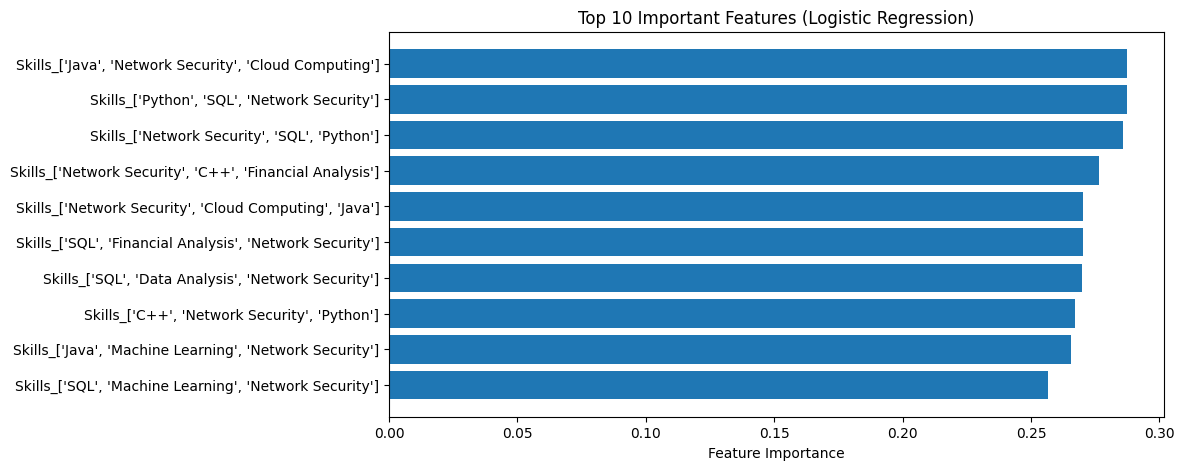

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from Logistic Regression
importance = np.abs(log_reg.coef_[0])  # Get coefficients for the first class
feature_names = X_train.columns

# Sort and plot the top 10 most important features
top_features = np.argsort(importance)[-10:]

plt.figure(figsize=(10, 5))
plt.barh(range(10), importance[top_features], align='center')
plt.yticks(range(10), [feature_names[i] for i in top_features])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features (Logistic Regression)")
plt.show()

In [ ]:
import pickle

# Save Logistic Regression model
with open("logistic_regression.pkl", "wb") as file:
    pickle.dump(log_reg, file)


print("Models saved successfully!")


Models saved successfully!


In [ ]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload your .pkl file


Saving logistic_regression.pkl to logistic_regression (1).pkl


In [ ]:
loaded_model = pickle.load(open("logistic_regression.pkl", "rb"))


In [ ]:
sample_input = X_test.iloc[0:5]  # Example input data
predictions = loaded_model.predict(sample_input)

print("Predicted Internship Roles:", predictions)


Predicted Internship Roles: ['Financial Analyst Intern' 'Cybersecurity Intern'
 'Software Engineering Intern' 'Financial Analyst Intern'
 'Data Analyst Intern']
